Kotug Project, Group 1

Allan Guzman, June Chen, Sarah Blanc

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches
from ipyleaflet import Map, GeoJSON, GeoData, basemaps, LayersControl
from shapely.geometry import Point, LineString
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium

In [3]:
def flatten_dict(d, parent_key='', sep='_'):
    items = {}
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.update(flatten_dict(v, new_key, sep=sep))
        else:
            items[new_key] = v
    return items

# Opening JSON file
f = open('port_arthur.json')
 
# returns JSON object as a dictionary
data = json.load(f)
 
# Flatten each dictionary and store the results in a list
flattened_dicts = [flatten_dict(d) for d in data['data']]

# Create a DataFrame
data = pd.DataFrame(flattened_dicts)

# Closing file
f.close()

In [4]:
data['navigation_time'] = pd.to_datetime(data['navigation_time'])

data = data[
    (data['navigation_status'] != 'moored') &
    (data['navigation_speed'] != 0)
    ].drop_duplicates()

In [5]:
def create_point(row):
    return Point(row['navigation_location_long'], row['navigation_location_lat'])

data['geometry'] = data.apply(create_point, axis=1)

tugs = data.loc[(data['vessel_type'] == 'tug')].reset_index()
non_tug = data.loc[(data['vessel_type'] != 'tug')].reset_index()

In [6]:
tugs

,index,vessel_type,vessel_callsign,vessel_subtype,vessel_imo,vessel_name,navigation_draught,navigation_status,navigation_location_long,navigation_location_lat,navigation_speed,navigation_time,navigation_course,device_mmsi,device_dimensions_to_bow,device_dimensions_to_starboard,device_dimensions_to_stern,device_dimensions_to_port,geometry
0,1425,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.96003,29.82966,0.1,2021-04-07 19:06:58+00:00,225.4,367182980,15,8,15,2,POINT (-93.96003 29.82966)
1,1426,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.96014,29.82968,1.0,2021-04-07 19:11:58+00:00,256.3,367182980,15,8,15,2,POINT (-93.96014 29.82968)
2,1427,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95980,29.82104,8.3,2021-04-07 19:16:59+00:00,164.6,367182980,15,8,15,2,POINT (-93.9598 29.82104)
3,1428,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95654,29.80986,8.3,2021-04-07 19:21:58+00:00,162.6,367182980,15,8,15,2,POINT (-93.95654 29.80986)
4,1429,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95659,29.81096,8.8,2021-04-07 19:26:59+00:00,342.3,367182980,15,8,15,2,POINT (-93.95659 29.81096)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2129,tug,WDJ4094,regular,9812042,TRITON,6.0,under-way-using-engine,-93.93849,29.86100,0.1,2021-04-08 06:56:52+00:00,154.1,367774360,16,14,7,6,POINT (-93.93849 29.861)
309,2130,tug,WDJ4094,regular,9812042,TRITON,6.0,under-way-using-engine,-93.93849,29.86100,0.1,2021-04-08 07:01:52+00:00,196.6,367774360,16,14,7,6,POINT (-93.93849 29.861)
310,2131,tug,WDJ4094,regular,9812042,TRITON,6.0,under-way-using-engine,-93.93849,29.86099,0.1,2021-04-08 07:06:51+00:00,182.5,367774360,16,14,7,6,POINT (-93.93849 29.86099)
311,2133,tug,WDJ4094,regular,9812042,TRITON,6.0,under-way-using-engine,-93.93850,29.86097,0.1,2021-04-08 07:16:53+00:00,196.7,367774360,16,14,7,6,POINT (-93.9385 29.86097)


In [7]:
merged_data = non_tug.merge(tugs,how= 'cross', suffixes = ('_nontug','_tug'))

In [8]:
merged_data

,index_nontug,vessel_type_nontug,vessel_callsign_nontug,vessel_subtype_nontug,vessel_imo_nontug,vessel_name_nontug,navigation_draught_nontug,navigation_status_nontug,navigation_location_long_nontug,navigation_location_lat_nontug,...,navigation_location_lat_tug,navigation_speed_tug,navigation_time_tug,navigation_course_tug,device_mmsi_tug,device_dimensions_to_bow_tug,device_dimensions_to_starboard_tug,device_dimensions_to_stern_tug,device_dimensions_to_port_tug,geometry_tug
0,0,tanker,EBZV,all,9236420,CATALUNYA SPIRIT,9.6,under-way-using-engine,-93.70755,29.41630,...,29.82966,0.1,2021-04-07 19:06:58+00:00,225.4,367182980,15,8,15,2,POINT (-93.96003 29.82966)
1,0,tanker,EBZV,all,9236420,CATALUNYA SPIRIT,9.6,under-way-using-engine,-93.70755,29.41630,...,29.82968,1.0,2021-04-07 19:11:58+00:00,256.3,367182980,15,8,15,2,POINT (-93.96014 29.82968)
2,0,tanker,EBZV,all,9236420,CATALUNYA SPIRIT,9.6,under-way-using-engine,-93.70755,29.41630,...,29.82104,8.3,2021-04-07 19:16:59+00:00,164.6,367182980,15,8,15,2,POINT (-93.9598 29.82104)
3,0,tanker,EBZV,all,9236420,CATALUNYA SPIRIT,9.6,under-way-using-engine,-93.70755,29.41630,...,29.80986,8.3,2021-04-07 19:21:58+00:00,162.6,367182980,15,8,15,2,POINT (-93.95654 29.80986)
4,0,tanker,EBZV,all,9236420,CATALUNYA SPIRIT,9.6,under-way-using-engine,-93.70755,29.41630,...,29.81096,8.8,2021-04-07 19:26:59+00:00,342.3,367182980,15,8,15,2,POINT (-93.95659 29.81096)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120187,1316,tanker,3EZV4,all,9397808,NINGBO DAWN,11.7,under-way-using-engine,-93.95630,29.82242,...,29.86100,0.1,2021-04-08 06:56:52+00:00,154.1,367774360,16,14,7,6,POINT (-93.93849 29.861)
120188,1316,tanker,3EZV4,all,9397808,NINGBO DAWN,11.7,under-way-using-engine,-93.95630,29.82242,...,29.86100,0.1,2021-04-08 07:01:52+00:00,196.6,367774360,16,14,7,6,POINT (-93.93849 29.861)
120189,1316,tanker,3EZV4,all,9397808,NINGBO DAWN,11.7,under-way-using-engine,-93.95630,29.82242,...,29.86099,0.1,2021-04-08 07:06:51+00:00,182.5,367774360,16,14,7,6,POINT (-93.93849 29.86099)
120190,1316,tanker,3EZV4,all,9397808,NINGBO DAWN,11.7,under-way-using-engine,-93.95630,29.82242,...,29.86097,0.1,2021-04-08 07:16:53+00:00,196.7,367774360,16,14,7,6,POINT (-93.9385 29.86097)


In [9]:
merged_data['time_diff'] = (merged_data['navigation_time_tug']-merged_data['navigation_time_nontug']).dt.total_seconds() / 60
merged_data['navigation_diff'] = abs(merged_data['navigation_course_tug']-merged_data['navigation_course_nontug'])
merged_data['speed_diff'] = abs(merged_data['navigation_speed_tug']-merged_data['navigation_speed_nontug'])


In [10]:
import numpy as np

# Function to calculate distance in kilometers using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    
    return distance

# Apply the haversine function to each row to create a new column 'distance_km'
merged_data['distance_km'] = merged_data.apply(lambda row: haversine(row['navigation_location_lat_nontug'], row['navigation_location_long_nontug'], row['navigation_location_lat_tug'], row['navigation_location_long_tug']), axis=1)


In [11]:
filtered_columns = merged_data[[
    'index_nontug','index_tug',
    'vessel_name_nontug','vessel_name_tug',
    'navigation_speed_nontug','navigation_speed_tug', 
    'navigation_course_nontug','navigation_course_tug',
    'speed_diff','navigation_diff', 'distance_km','time_diff',
    'navigation_time_nontug'
    ]]

In [12]:
filtered_columns = filtered_columns[ 
    (abs(merged_data['time_diff']) < 3) & 
    (merged_data['distance_km'] < 0.25 ) &
    (merged_data['navigation_diff'] < 10 ) &
    (merged_data['speed_diff'] < 1 ) ]

In [13]:
filtered_columns

,index_nontug,index_tug,vessel_name_nontug,vessel_name_tug,navigation_speed_nontug,navigation_speed_tug,navigation_course_nontug,navigation_course_tug,speed_diff,navigation_diff,distance_km,time_diff,navigation_time_nontug
68238,639,1429,IRELAND,SABINE,8.7,8.8,341.1,342.3,0.1,1.2,0.037093,0.050000,2021-04-07 19:26:56+00:00
68552,640,1430,IRELAND,SABINE,8.0,8.2,14.4,5.9,0.2,8.5,0.098622,0.033333,2021-04-07 19:31:55+00:00
69180,642,1432,IRELAND,SABINE,7.1,7.2,16.3,11.3,0.1,5.0,0.101213,-0.050000,2021-04-07 19:42:00+00:00
69494,643,1433,IRELAND,SABINE,5.5,5.4,39.6,39.7,0.1,0.1,0.098313,0.050000,2021-04-07 19:46:56+00:00
69808,644,1434,IRELAND,SABINE,4.1,4.0,39.7,42.6,0.1,2.9,0.099883,0.000000,2021-04-07 19:51:58+00:00
70122,645,1435,IRELAND,SABINE,3.9,4.0,41.2,40.6,0.1,0.6,0.097495,-0.033333,2021-04-07 19:57:00+00:00
70436,646,1436,IRELAND,SABINE,5.2,5.4,26.6,33.7,0.2,7.1,0.102090,0.000000,2021-04-07 20:01:57+00:00
70750,647,1437,IRELAND,SABINE,7.4,7.5,37.8,34.1,0.1,3.7,0.095502,0.050000,2021-04-07 20:06:57+00:00
71064,648,1438,IRELAND,SABINE,8.2,8.3,38.5,38.1,0.1,0.4,0.093954,0.016667,2021-04-07 20:11:56+00:00
71378,649,1439,IRELAND,SABINE,8.6,8.7,37.8,40.7,0.1,2.9,0.094901,0.083333,2021-04-07 20:16:55+00:00


In [14]:
tugged_answer = pd.concat([
    tugs[tugs['index'].isin(filtered_columns['index_tug'])],
    non_tug[non_tug['index'].isin(filtered_columns['index_nontug'])]]
)


In [15]:
tugged_answer

,index,vessel_type,vessel_callsign,vessel_subtype,vessel_imo,vessel_name,navigation_draught,navigation_status,navigation_location_long,navigation_location_lat,navigation_speed,navigation_time,navigation_course,device_mmsi,device_dimensions_to_bow,device_dimensions_to_starboard,device_dimensions_to_stern,device_dimensions_to_port,geometry
4,1429,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95659,29.81096,8.8,2021-04-07 19:26:59+00:00,342.3,367182980,15,8,15,2,POINT (-93.95659 29.81096)
5,1430,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95972,29.82188,8.2,2021-04-07 19:31:57+00:00,5.9,367182980,15,8,15,2,POINT (-93.95972 29.82188)
7,1432,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.95240,29.84249,7.2,2021-04-07 19:41:57+00:00,11.3,367182980,15,8,15,2,POINT (-93.9524 29.84249)
8,1433,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.94748,29.85031,5.4,2021-04-07 19:46:59+00:00,39.7,367182980,15,8,15,2,POINT (-93.94748 29.85031)
9,1434,tug,WDD7182,None,9397391,SABINE,4.0,under-way-using-engine,-93.94244,29.85557,4.0,2021-04-07 19:51:58+00:00,42.6,367182980,15,8,15,2,POINT (-93.94244 29.85557)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,688,cargo,C6DD6,all,9770543,IRELAND,12.2,under-way-using-engine,-94.05058,30.06909,5.0,2021-04-07 23:30:18+00:00,309.4,311000646,196,23,33,10,POINT (-94.05058 30.06909)
268,689,cargo,C6DD6,all,9770543,IRELAND,12.2,under-way-using-engine,-94.05697,30.07383,3.4,2021-04-07 23:36:35+00:00,305.2,311000646,196,23,33,10,POINT (-94.05697 30.07383)
269,690,cargo,C6DD6,all,9770543,IRELAND,12.2,under-way-using-engine,-94.06166,30.07627,3.6,2021-04-07 23:41:36+00:00,297.6,311000646,196,23,33,10,POINT (-94.06166 30.07627)
270,691,cargo,C6DD6,all,9770543,IRELAND,12.2,under-way-using-engine,-94.06220,30.07650,3.7,2021-04-07 23:42:07+00:00,297.4,311000646,196,23,33,10,POINT (-94.0622 30.0765)


In [16]:
# Create a GeoDataFrame named tugged_answer_gdf
tugged_answer_gdf = gpd.GeoDataFrame(tugged_answer, geometry='geometry')

# Sort the GeoDataFrame by 'vessel_name' and 'navigation_time'
tugged_answer_gdf = tugged_answer_gdf.sort_values(by=['vessel_name', 'navigation_time'])

# Define a function to create LineStrings from sorted points
def create_line(group):
    if len(group) > 1:
        return LineString(group['geometry'].tolist())
    else:
        return None

# Group the GeoDataFrame by 'unique_identifier' and apply the create_line function
lines_gdf = tugged_answer_gdf.groupby('vessel_name').apply(create_line).reset_index(name='geometry')

# Convert the resulting DataFrame to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(lines_gdf, geometry='geometry')

# Now, lines_gdf contains LineString geometries connecting points based on time order
print(lines_gdf)


  vessel_name                                           geometry
0   BUCCANEER  LINESTRING (-94.05880 30.07475, -94.06342 30.0...
1     IRELAND  LINESTRING (-93.95678 29.81125, -93.95947 29.8...
2      SABINE  LINESTRING (-93.95659 29.81096, -93.95972 29.8...


In [17]:
# Convert it to GeoJSON with a style function
def style_function(feature):
    # Define a list of colors you want to use for each row
    colors = ['red', 'blue', 'green']  # Add more colors as needed
    # Get the index of the current feature and select a color from the list
    color_index = feature['id'] % len(colors)
    color = colors[color_index]
    return {
        'color': color,
        'weight': 2,
        'opacity': 0.8,
    }

gdf = lines_gdf.set_crs(epsg=4326)

# Convert it to GeoJSON
geojson_data = gdf.to_json()
m = folium.Map(location=[30.0, -94.0], zoom_start=11)

# Add the GeoJSON data as a layer to the map
folium.GeoJson(geojson_data).add_to(m)

m

In [18]:
import geopandas as gpd
from shapely.geometry import LineString
from itertools import tee, islice



# Sort the GeoDataFrame by 'vessel_name' and 'navigation_time'
tugged_answer_gdf = tugged_answer_gdf.sort_values(by=['vessel_name', 'navigation_time'])

# Create a function to pair consecutive rows in a group
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

# Create an empty list to store LineString geometries
tugged_answer_gdf['line_geometry'] = None

# Iterate through groups based on 'vessel_name'
for vessel_name, group in tugged_answer_gdf.groupby('vessel_name'):
    # Iterate through consecutive rows in the group
    for (idx1, row1), (idx2, row2) in pairwise(group.iterrows()):
        # Create a LineString between the current and next point
        line = LineString([row1.geometry, row2.geometry])
        tugged_answer_gdf.at[idx1, 'line_geometry'] = line


# Now, lines_gdf contains LineString geometries for each row connecting the current point to the next point based on time order
tugged_answer_gdf.set_geometry('line_geometry',inplace=True)




In [19]:
tugged_answer_gdf_plot = tugged_answer_gdf[[
    'vessel_name',
    'navigation_speed',
    'line_geometry']]

tugged_answer_gdf_plot = tugged_answer_gdf_plot.dropna()
tugged_answer_gdf_plot.set_crs(epsg=4326)

# Convert it to GeoJSON
geojson_data = tugged_answer_gdf_plot.to_json()

In [20]:
# Define the color-coding based on speed (adjust vmin and vmax accordingly)
speed_col = tugged_answer['navigation_speed']
cmap = plt.get_cmap('viridis')  # Choose a colormap
normalize = Normalize(vmin=speed_col.min(), vmax=speed_col.max())

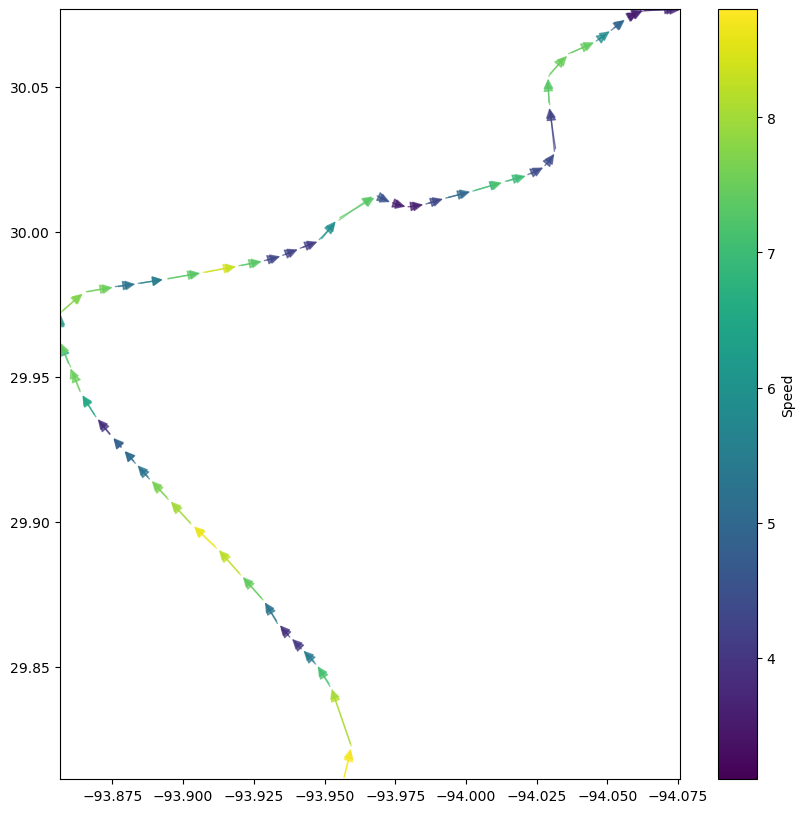

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

for boat in tugged_answer['vessel_name'].unique():
    vessel_data = tugged_answer[tugged_answer['vessel_name'] == boat]
    vessel_data.reset_index(inplace=True)

    #print(vessel_data.vessel_name[0], boat)
    for idx, row in vessel_data.iterrows():
        start_lon = row['navigation_location_long']
        start_lat = row['navigation_location_lat']
        end_idx = idx + 1 if idx + 1 < len(vessel_data) else idx
        end_lon = vessel_data.loc[end_idx, 'navigation_location_long']
        end_lat = vessel_data.loc[end_idx, 'navigation_location_lat']
        arrow_color = cmap(normalize(row['navigation_speed']))
    #print(idx, start_lon, start_lat,end_idx, end_lon,end_lat)
        
        arrow = mpatches.FancyArrowPatch(
            (start_lon, start_lat),
            (end_lon, end_lat),
            color=arrow_color,
            arrowstyle='-|>',
            mutation_scale=15,
            lw=1,
            alpha=0.7
        )
        ax.add_patch(arrow)

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])  # Empty array to ensure the scale corresponds to the speed values
cbar = plt.colorbar(sm, ax=ax, label='Speed')
ax.set(
    xlim=(
        max(vessel_data['navigation_location_long']), 
        min(vessel_data['navigation_location_long'])), 
    ylim=(
        min(vessel_data['navigation_location_lat']), 
        max(vessel_data['navigation_location_lat'])))

# Show the plot or save it
plt.show()


In [22]:
# Parse the GeoJSON string into a dictionary
geojson_data = json.loads(geojson_data)

In [23]:
geojson_data

{'type': 'FeatureCollection',
 'features': [{'id': '79',
   'type': 'Feature',
   'properties': {'vessel_name': 'BUCCANEER', 'navigation_speed': 3.7},
   'geometry': {'type': 'LineString',
    'coordinates': [[-94.0588, 30.07475], [-94.06342, 30.07682]]}},
  {'id': '80',
   'type': 'Feature',
   'properties': {'vessel_name': 'BUCCANEER', 'navigation_speed': 3.7},
   'geometry': {'type': 'LineString',
    'coordinates': [[-94.06342, 30.07682], [-94.07667, 30.07666]]}},
  {'id': '218',
   'type': 'Feature',
   'properties': {'vessel_name': 'IRELAND', 'navigation_speed': 8.7},
   'geometry': {'type': 'LineString',
    'coordinates': [[-93.95678, 29.81125], [-93.95947, 29.82274]]}},
  {'id': '219',
   'type': 'Feature',
   'properties': {'vessel_name': 'IRELAND', 'navigation_speed': 8.0},
   'geometry': {'type': 'LineString',
    'coordinates': [[-93.95947, 29.82274], [-93.95218, 29.84338]]}},
  {'id': '221',
   'type': 'Feature',
   'properties': {'vessel_name': 'IRELAND', 'navigation_spe

In [24]:


# Create a folium map centered on the first feature
map_center = [tugged_answer['navigation_location_lat'].mean(), tugged_answer['navigation_location_long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define a function to determine color based on speed
def color_speed(speed):
    if speed < 2.5:
        return 'blue'
    elif speed < 5:
        return 'yellow'
    else:
        return 'green'

# Add LineString geometries with speed-based colors to the map
for feature in geojson_data["features"]:
    speed = feature["properties"]["navigation_speed"]
    color = color_speed(speed)
    line_string = json.dumps(feature["geometry"])
    folium.GeoJson(
        line_string,
        style_function=lambda x, color=color: {
            'color': color,
            'weight': 1.5
        },
        tooltip=feature["properties"]["vessel_name"]
    ).add_to(m)

folium.TileLayer('cartodbpositron').add_to(m)


# Save the map to an HTML file
m

Visual comparison of naviguation speeds of 2 chosen vessels:

In [25]:
# Create a Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    dcc.Dropdown(id='vessel-selector-1', multi=False, placeholder="Select Vessel 1"),
    dcc.Dropdown(id='vessel-selector-2', multi=False, placeholder="Select Vessel 2"),
    dcc.Graph(id='speed-comparison'),
])

# Create a color map to assign unique colors to vessels
vessel_colors = px.colors.qualitative.Set3

# Populate the dropdown menus with vessel names
vessel_dropdown = [{"label": vessel_name, "value": vessel_name} for vessel_name in data['vessel_name'].unique()]
@app.callback(
    Output('vessel-selector-1', 'options'),
    Output('vessel-selector-2', 'options'),
    Input('vessel-selector-1', 'value'),
    Input('vessel-selector-2', 'value')
)
def update_vessel_options(selected_vessel_1, selected_vessel_2):
    # Exclude the selected vessel from the other dropdown
    available_vessels = [vessel for vessel in data['vessel_name'].unique() if vessel != selected_vessel_1]
    
    return ([{"label": vessel, "value": vessel} for vessel in available_vessels],
            [{"label": vessel, "value": vessel} for vessel in available_vessels])

# Define callback function to update speed comparison graph
@app.callback(
    Output('speed-comparison', 'figure'),
    Input('vessel-selector-1', 'value'),
    Input('vessel-selector-2', 'value')
)
def update_speed_comparison(selected_vessel_1, selected_vessel_2):
    if selected_vessel_1 is None or selected_vessel_2 is None:
        return go.Figure()
    
    # Filter data for the selected vessels
    selected_vessel_data_1 = data[data['vessel_name'] == selected_vessel_1]
    selected_vessel_data_2 = data[data['vessel_name'] == selected_vessel_2]
    
    # Assign unique colors to the selected vessels
    color_1 = vessel_colors[0]
    color_2 = vessel_colors[1]
    
    # Create line traces for the selected vessels
    trace_1 = go.Scatter(x=selected_vessel_data_1['navigation_time'], y=selected_vessel_data_1['navigation_speed'],
                         mode='lines+markers', hoverinfo='x+y',
                         text=selected_vessel_data_1['navigation_time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                         line=dict(color=color_1), name=selected_vessel_1)
    trace_2 = go.Scatter(x=selected_vessel_data_2['navigation_time'], y=selected_vessel_data_2['navigation_speed'],
                         mode='lines+markers', hoverinfo='x+y',
                         text=selected_vessel_data_2['navigation_time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                         line=dict(color=color_2), name=selected_vessel_2)
    
    # Create the speed comparison graph
    fig = make_subplots(rows=1, cols=1, subplot_titles=("Speed Comparison",))
    fig.add_trace(trace_1)
    fig.add_trace(trace_2)
    fig.update_layout(
        title_text=f'Speed comparison between {selected_vessel_1} and {selected_vessel_2}',
        xaxis_title='Time',
        yaxis_title='Navigation speed',
        xaxis=dict(tickangle=-45),
    )
    
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

/Users/Sarah/opt/anaconda3/envs/CIEM6302/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/Sarah/opt/anaconda3/envs/CIEM6302/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Additional visualizations can be found in the "AdditionalVisualizations.ipynb" file. These concern more general visualizations of the data set.

**Data Ethics**

For our particular project, we have a dataset that mostly comprises of tugboat or other vessel monitoring data without any direct or sensitive human information. This trait considerably narrows the scope of some ethical issues that are frequently connected to data science projects. For instance, a number of issues, like as privacy and informed permission, become less important because we are primarily dealing with vessel-related data rather than direct human data. We nevertheless used the seminar's information in our project to take the ethical implications of data science into consideration and to apply it to our project.

The ethical aspects we should consider for this vessel tracking and prediction project are the following:

1. Value-sensitive design:

   - Consider stakeholder values: Identify the major parties involved in our project, such as port authorities, environmental organisations, coastal communities and vessel operators. Surveys, interviews or focus groups can be used to learn about people's attitudes towards vessel tracking and tug prediction.
   - Transparency: Transparency is implemented by outlining data sources, processing strategies and model algorithms. Make sure stakeholders can easily grasp the construction and use of our prediction models.
   - Value trade-offs: We have to be aware of potential conflicts between the values of various stakeholders. For instance, whereas coastal communities may put more emphasis on environmental protection, vessel operators may prioritise cost-effectiveness and efficiency. Trade-offs should be communicated in detail when they occur and stakeholders should be involved in moral decision-making.Indeed, the goal of tugboat operators and port authorities may not be consistent, which highly relies on the design logic of the tugboat assignment algorithm. We should ensure fairness in task allocation to different tugboat companies. Besides, while designing the algorithm, the emission pollution could be taken into account as well to align with the goal of environmental organizations. However, that last point goes beyond the project boundaries and would present a huge challenge.

 

2. Privacy:

   - Data minimization: We only will gather the information required to achieve the goals of our project. Keep data collection to the most pertinent tracking and vessel parameters, minimising intrusive or unnecessary details.
   - Anonymization: To safeguard the identities of vessel operators and crew members, sensitive data should be pseudonymized or anonymized. Only transmit or store personally identifiable information (PII) when it is absolutely necessary for compliance or safety reasons. However,  in the provided data set, we do not have such data. In case we add other additional data, we should pay attention to this. If this additional data involves personal information, we should establish a clear and transparent consent mechanism. We have to provide vessel operators with information on data usage and obtain their informed consent.
   - Data security: Implement robust data security measures. However, once again here, we do not have very sensible data. Most vessel data can be reached on public websites. Whereas, during the whole service process, the AIS location data (specific coordinates) for vessels are required, which should only be notified to the service company responsible for tugging.

3. Bias:

   - Preexisting bias: Check our vessel tracking data for biases in great detail. Bias may be caused by past data-gathering methods or by the underrepresentation of particular vessel types or geographic areas.
   - Technical bias: During development, we have to keep an eye out for and audit our machine learning models for technical bias. We have to examine whether certain vessel types, routes, or operators are disproportionately impacted by the models. In the training part, the selection of objects should contain all possible categories to avoid bias in the predictions.
   - Emergent bias: Even though this step is further in the process than our project, during deployment, one has to keep checking our models for emerging biases. It includes gathering user and stakeholder opinions about any apparent biases or discrepancies in model predictions and recalibrating models frequently to reduce emergent biases that might appear in real-world situations.
   - Easy to use. The designed prediction algorithm should be easily understandable by operators and users.

4. Fairness:

   - Fair model metrics: Choice of fairness metrics that are consistent with the goals of our project. Consideration of indicators like disparate impact to assess whether the model's suggestions are equitable across various vessel types or operators, for instance, if fairness in tug allocation is important.
   - Bias Mitigation: As part of our model development process, we can use bias mitigation approaches. These methods should be put to the test and refined to make sure they don't add new biases or have a detrimental effect on model performance.

5. Ethical review and compliance:

   - To make sure that our project complies with industry-specific and ethical norms, we could consult ethics committees or specialists in marine ethics and data privacy.

6. Continuous evaluation and improvement:

   - We could assess the ethical compliance of the project on a regular basis and adapt as ethical considerations and stakeholder comments change.

 

While it is our aspiration to address all ethical considerations outlined above, we understand that practical constraints and project-specific circumstances may limit our ability to fully implement each point.~~~~

Our aim is not only to implement ethical safeguards where possible but also to approach our project with a heightened sensitivity to the ethical dimensions it encompasses. We are aware and try to take care of the value of engaging with stakeholders, maintaining transparency and continuously striving for fairness and privacy protection.